In [1]:
path = 'usag.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build\\/JZO54K) AppleWebKit\\/534.30 (KHTML, like Gecko) Version\\/4.0 Mobile Safari\\/534.30", "c": "US", "nk": 0, "tz": "America\\/Los_Angeles", "gr": "CA", "g": "15r91", "h": "10OBm3W", "l": "pontifier", "al": "en-US", "hh": "j.mp", "r": "direct", "u": "http:\\/\\/www.nsa.gov\\/", "t": 1368832205, "hc": 1365701422, "cy": "Anaheim", "ll": [ 33.816101, -117.979401 ] }\n'

In [2]:
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Los_Angeles',
 'gr': 'CA',
 'g': '15r91',
 'h': '10OBm3W',
 'l': 'pontifier',
 'al': 'en-US',
 'hh': 'j.mp',
 'r': 'direct',
 'u': 'http://www.nsa.gov/',
 't': 1368832205,
 'hc': 1365701422,
 'cy': 'Anaheim',
 'll': [33.816101, -117.979401]}

In [3]:
print (records[0]['tz'])

America/Los_Angeles


In [4]:
#time_zones = [rec['tz'] for rec in records] NOT ALL RECORDS HAVE TZ FIELD!
time_zones = [rec['tz'] for rec in records if 'tz' in rec] #ADD IF
time_zones[:10]

['America/Los_Angeles',
 '',
 'America/Phoenix',
 'America/Chicago',
 '',
 'America/Indianapolis',
 'America/Chicago',
 '',
 'Australia/NSW',
 '']

In [5]:
#python function
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] =1
    return counts

#pass time_zones list to function
counts = get_counts(time_zones)
counts['America/Los_Angeles']

421

In [6]:
len(time_zones)

3839

In [7]:
#dictionary for top counts
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(40, 'America/Phoenix'),
 (50, 'America/Indianapolis'),
 (85, 'Europe/London'),
 (89, 'America/Denver'),
 (102, 'Asia/Tokyo'),
 (184, 'America/Puerto_Rico'),
 (421, 'America/Los_Angeles'),
 (636, ''),
 (686, 'America/Chicago'),
 (903, 'America/New_York')]

In [8]:
from pandas import DataFrame, Series
import pandas as pd
frame = DataFrame(records)

tz_counts = frame['tz'].value_counts()
tz_counts[:10]

clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York        903
America/Chicago         686
Unknown                 636
America/Los_Angeles     421
America/Puerto_Rico     184
Missing                 120
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
Name: tz, dtype: int64

<AxesSubplot:>

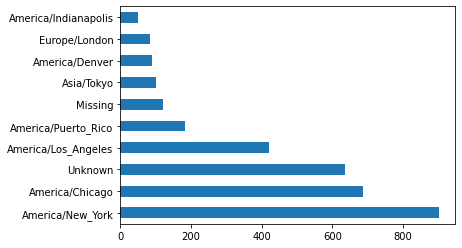

In [9]:
tz_counts[:10].plot(kind='barh', rot=0)